In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold

import plotly as py
import plotly.graph_objs as go
import plotly.express as px



In [2]:
X, y  = fetch_openml('mnist_784', version=1,
                     return_X_y=True,
                     as_frame=True,
                     parser='auto')
#normalize since images have values from 0 to 255
X = X / 255
#X,y= X.values [:5000], y[:5000].astype(int).values

In [3]:
display(X.shape,y.shape)

(70000, 784)

(70000,)

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    plt.axhline(y=0.9, color='r', linestyle='--')
    plt.axvline(x=88, ymax=0.9, color='r', linestyle='--')


    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

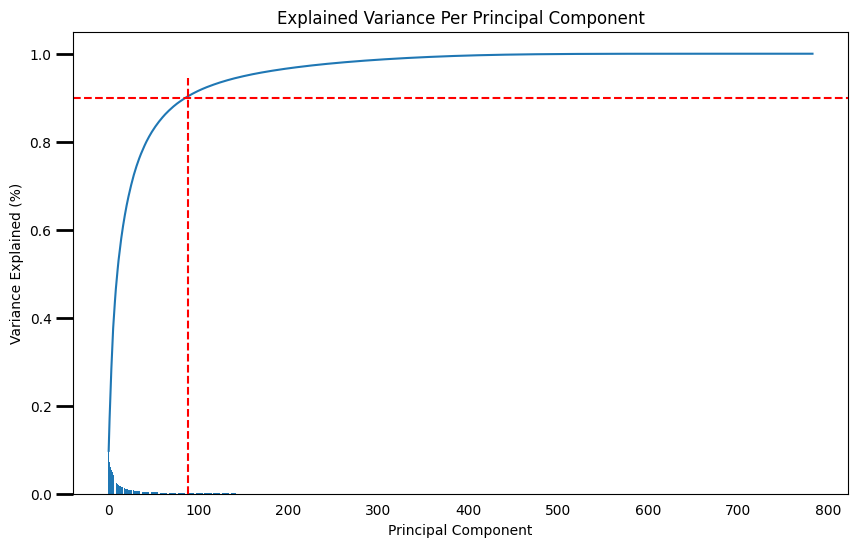

In [11]:
from sklearn.decomposition import PCA
# Example usage
pca = PCA(n_components=784)
pca.fit(X)
x_pca = pca.transform(X)
plot(pca)

In [13]:

feat_var_list = list(zip(range(1,784), pca.explained_variance_ratio_.cumsum()))

for item in feat_var_list:
  if item[1] > 0.9:
      print(item)


(87, 0.9005229738568301)
(88, 0.9017746940956074)
(89, 0.9029999890616873)
(90, 0.9042041816137658)
(91, 0.9053678108617657)
(92, 0.9065110000926633)
(93, 0.9076364692531278)
(94, 0.9087350863743654)
(95, 0.9098185180310642)
(96, 0.9108902715694273)
(97, 0.9119271930547552)
(98, 0.9129613767246676)
(99, 0.9139672833557072)
(100, 0.9149666084974453)
(101, 0.9159433444885063)
(102, 0.9168849570578272)
(103, 0.9178207855579698)
(104, 0.9187324493516488)
(105, 0.919633189678252)
(106, 0.920522689870334)
(107, 0.9213842720328513)
(108, 0.9222368204027644)
(109, 0.9230778207401023)
(110, 0.9238950469698349)
(111, 0.9246810708136862)
(112, 0.9254585745401119)
(113, 0.9262343851322408)
(114, 0.9269991723572202)
(115, 0.9277597435913384)
(116, 0.9285085290609122)
(117, 0.9292387700397173)
(118, 0.9299641336749552)
(119, 0.9306799705471525)
(120, 0.9313833756098266)
(121, 0.9320751214748353)
(122, 0.9327620413451886)
(123, 0.9334414201232596)
(124, 0.934113164384526)
(125, 0.9347744348382344)
(1

In [14]:
# sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [27]:
# Check the shapes
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)


Shape of X: (56000, 784)
Shape of y: (56000,)


In [30]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

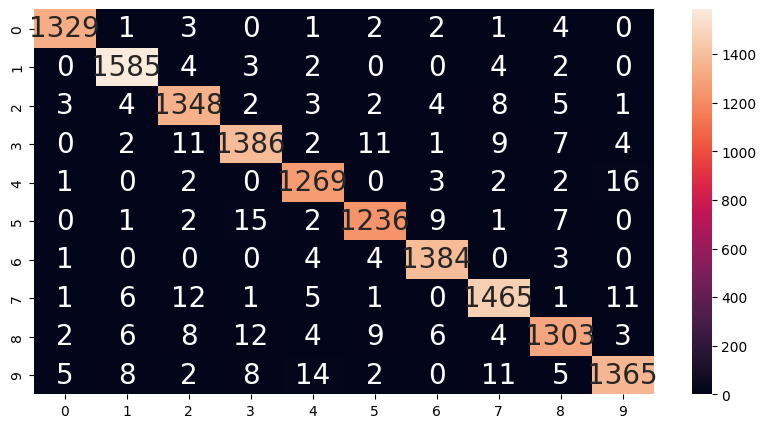

In [32]:
# Confusion matrix.
confusion_matrix_arr = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix_df, annot=True,
           fmt='d', ax=ax, annot_kws={"size": 20})
plt.show()

In [33]:
pca = PCA(n_components=88)
pca.fit(X)
x_pca = pca.transform(X)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,random_state=42,test_size=0.2)

In [36]:
# Check the shapes
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (56000, 88)
Shape of y: (56000,)


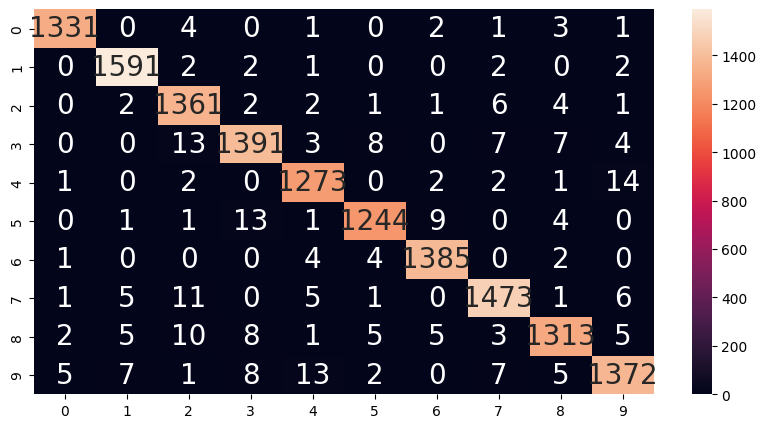

In [35]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


confusion_matrix_arr = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix_df, annot=True,
           fmt='d', ax=ax, annot_kws={"size": 20})
plt.show()